In [2]:
import numpy  as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse

import matplotlib.pyplot as plt
%matplotlib inline

import json
import urllib

# titanic dataset
import seaborn as sns

# 비정형 데이터 처리를 위한 라이브러리
from bs4 import BeautifulSoup
import requests
import re



print('numpy  version - ' , np.__version__)
print('pandas version - ' , pd.__version__)

numpy  version -  1.20.3
pandas version -  1.3.4


In [3]:
def seriesInfo(s) :
    print('series : index + values \n' , s)
    print('index  - ' , s.index  , type(s.index))
    print('values - ' , s.values , type(s.values))

def frmInfo(df) :
    display('data - ' , df )
    print()
    print('shape   - ' , df.shape , df.shape[0] , df.shape[1])
    print('size    - ' , df.size )
    print('ndim    - ' , df.ndim)
    print('index   - ' , df.index    , type(df.index))
    print('columns - ' , df.columns  , type( df.columns ))
    print('values  - \n' , df.values , type(df.values) )

In [4]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

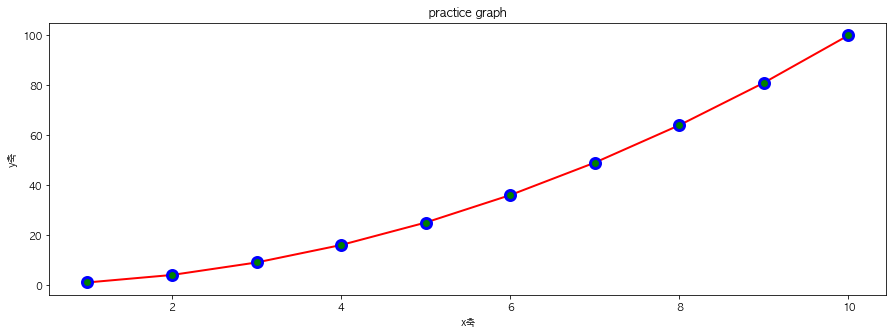

In [14]:
fig = plt.figure(figsize=(15,5))

x_data = [1,2,3,4,5,6,7,8,9,10]
y_data = [X ** 2 for X in x_data]

plt.plot(x_data, y_data, c = 'red', lw = 2, ls = '-', marker = 'o',
         ms = 10, mec = 'blue', mew = 3, mfc = 'green')

plt.xlabel('x축')
plt.ylabel('y축')
plt.title('practice graph')


plt.show()
plt.close()

In [8]:
tmp_frm = pd.read_csv('/Users/choijaewoo/pandas_data/read_csv_sample.csv')
frmInfo(tmp_frm)

'data - '

,c0,c1,c2,c3
0,0,1,4,7
1,1,2,5,8
2,2,3,6,9



shape   -  (3, 4) 3 4
size    -  12
ndim    -  2
index   -  RangeIndex(start=0, stop=3, step=1) <class 'pandas.core.indexes.range.RangeIndex'>
columns -  Index(['c0', 'c1', 'c2', 'c3'], dtype='object') <class 'pandas.core.indexes.base.Index'>
values  - 
 [[0 1 4 7]
 [1 2 5 8]
 [2 3 6 9]] <class 'numpy.ndarray'>


In [9]:
tmp_frm = pd.read_csv('/Users/choijaewoo/pandas_data/read_csv_sample.csv' , header = None)
frmInfo(tmp_frm)

'data - '

,0,1,2,3
0,c0,c1,c2,c3
1,0,1,4,7
2,1,2,5,8
3,2,3,6,9



shape   -  (4, 4) 4 4
size    -  16
ndim    -  2
index   -  RangeIndex(start=0, stop=4, step=1) <class 'pandas.core.indexes.range.RangeIndex'>
columns -  Int64Index([0, 1, 2, 3], dtype='int64') <class 'pandas.core.indexes.numeric.Int64Index'>
values  - 
 [['c0' 'c1' 'c2' 'c3']
 ['0' '1' '4' '7']
 ['1' '2' '5' '8']
 ['2' '3' '6' '9']] <class 'numpy.ndarray'>


In [10]:
tmp_frm = pd.read_csv('/Users/choijaewoo/pandas_data/read_csv_sample.csv' , index_col = 'c0')
frmInfo(tmp_frm)

'data - '

,c1,c2,c3
c0,,,
0,1,4,7
1,2,5,8
2,3,6,9



shape   -  (3, 3) 3 3
size    -  9
ndim    -  2
index   -  Int64Index([0, 1, 2], dtype='int64', name='c0') <class 'pandas.core.indexes.numeric.Int64Index'>
columns -  Index(['c1', 'c2', 'c3'], dtype='object') <class 'pandas.core.indexes.base.Index'>
values  - 
 [[1 4 7]
 [2 5 8]
 [3 6 9]] <class 'numpy.ndarray'>


In [11]:
tmp_frm = pd.read_excel('/Users/choijaewoo/pandas_data/남북한발전전력량.xlsx' , header = None )
frmInfo(tmp_frm)

'data - '

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
2,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
3,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
4,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
5,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
6,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
7,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
8,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
9,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-



shape   -  (10, 29) 10 29
size    -  290
ndim    -  2
index   -  RangeIndex(start=0, stop=10, step=1) <class 'pandas.core.indexes.range.RangeIndex'>
columns -  Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28],
           dtype='int64') <class 'pandas.core.indexes.numeric.Int64Index'>
values  - 
 [['전력량 (억㎾h)' '발전 전력별' '1990' '1991' '1992' '1993' '1994' '1995' '1996'
  '1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004' '2005' '2006'
  '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014' '2015' '2016']
 ['남한' '합계' 1077 1186 1310 1444 1650 1847 2055 2244 2153 2393 2664 2852
  3065 3225 3421 3646 3812 4031 4224 4336 4747 4969 5096 5171 5220 5281
  5404]
 [nan '수력' 64 51 49 60 41 55 52 54 61 61 56 42 53 69 59 52 52 50 56 56 65
  78 77 84 78 58 66]
 [nan '화력' 484 573 696 803 1022 1122 1264 1420 1195 1302 1518 1689 1821
  1859 2056 2127 2272 2551 2658 2802 3196 3343 3430 3581 3427 3402 3523]
 [

In [12]:
tmp_frm = pd.read_json('/Users/choijaewoo/pandas_data/read_json_sample.json')
frmInfo(tmp_frm)

'data - '

,name,year,developer,opensource
pandas,,2008,Wes Mckinneye,True
NumPy,,2006,Travis Oliphant,True
matplotlib,,2003,John D. Hunter,True



shape   -  (3, 4) 3 4
size    -  12
ndim    -  2
index   -  Index(['pandas', 'NumPy', 'matplotlib'], dtype='object') <class 'pandas.core.indexes.base.Index'>
columns -  Index(['name', 'year', 'developer', 'opensource'], dtype='object') <class 'pandas.core.indexes.base.Index'>
values  - 
 [['' 2008 'Wes Mckinneye' 'True']
 ['' 2006 'Travis Oliphant' 'True']
 ['' 2003 'John D. Hunter' 'True']] <class 'numpy.ndarray'>


In [13]:
tmp_frm.values

array([['', 2008, 'Wes Mckinneye', 'True'],
       ['', 2006, 'Travis Oliphant', 'True'],
       ['', 2003, 'John D. Hunter', 'True']], dtype=object)